# 本範例用來示範jettool.ta模組如何直接取代ta-lib使用

In [1]:
!git clone https://github.com/beaneball33/jettool.git

'git' 不是內部或外部命令、可執行的程式或批次檔。


In [2]:
import numpy
import pandas
import mpl_finance as mpf

C:\Users\2013040101\Anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


### import模組，裡面就有範例檔

In [3]:
#以下四行是用來控制範例可以找到jettool
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
#import此功能套件需要的tejapi，
from jettool import ta
data = pandas.read_csv('jettool\\stock.csv')
data['coid'] = data['coid'].astype(str)
data['high_d'] = data['最高價(元)']
data['low_d'] = data['最低價(元)']
data['close_d'] = data['收盤價(元)']
data['roi'] = data['報酬率-Ln']


### 或是從API撈資料

In [4]:
import tejapi
tejapi.ApiConfig.api_key ="GDEy0mWAGqnI3EemCREGREZMcEVbnF"
ticks = 'Y9999'         # 設定股票代碼
stdate = '2020-01-01'    # 設定查詢起日
endate = '2020-07-30'    # 設定查詢迄日


df = tejapi.get('TWN/APRCD', 
           coid = ticks,
           mdate = {'gte':stdate, 'lte':endate}, 
           opts ={'columns':['mdate','open_d','high_d','low_d','close_d','volume'], 
           'sort':['mdate.asc', 'coid.asc']}, paginate=True).reset_index(drop=True)
#df.set_index('mdate', inplace = True)
#df.index = df.index.format(formatter=lambda x: x.strftime('%Y-%m-%d')) 


### 首先演示jettool.ta的特有功能，可一次執行所有股票的該指標計算 

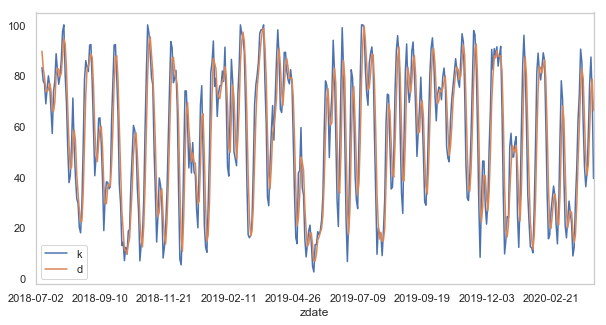

In [40]:
data[['k','d']] = ta.STOCH(data=data)
df = data.loc[data['coid']=='2330',['zdate','k','d']]
df['zdate'] = pandas.DatetimeIndex(df['zdate'])
df = df.set_index('zdate')
df.plot(figsize=(10,5),kind='line')
plt.show()

In [19]:
ta.MACD(data=data)

,macd,macdsignal,macdhist
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
370697,-0.638874,-0.973492,0.334618
370698,-0.434358,-0.865665,0.431307
370699,-0.305073,-0.753547,0.448474
370700,-0.164407,-0.635719,0.471312


In [20]:
ta.RSI(data=data)

,rsi
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
370697,51.387051
370698,56.272817
370699,53.778274
370700,55.884329


In [21]:
ta.MOM(data=data)

,mot
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
370697,3.0
370698,4.9
370699,2.3
370700,2.2


# 與ta-lib比較

### 由於ta-lib一次只支援一檔股票計算，我們把台積電資料取出來示範

In [8]:
zd = data.loc[data['coid']=='2330',['zdate','coid','high_d','low_d','close_d','roi']]
zd['zdate'] = pandas.DatetimeIndex(zd['zdate'])
zd = zd.set_index('zdate')
zd

,coid,high_d,low_d,close_d,roi
zdate,,,,,
2018-07-02,2330,219.0,214.0,214.0,-1.1615
2018-07-03,2330,218.0,213.5,214.5,0.2334
2018-07-04,2330,217.5,215.5,216.0,0.6969
2018-07-05,2330,215.0,213.0,214.5,-0.6969
2018-07-06,2330,217.5,215.0,217.0,1.1588
...,...,...,...,...,...
2020-04-07,2330,284.0,280.5,283.0,2.6859
2020-04-08,2330,285.5,283.0,285.0,0.7042
2020-04-09,2330,288.0,282.5,283.0,-0.7042


In [9]:
ta.STOCH(zd.high_d, zd.low_d, zd.close_d)

,k,d
zdate,,
2018-07-02,NaN,NaN
2018-07-03,NaN,NaN
2018-07-04,NaN,NaN
2018-07-05,NaN,NaN
2018-07-06,NaN,NaN
...,...,...
2020-04-07,57.314861,45.109682
2020-04-08,76.840570,58.666467
2020-04-09,87.306936,73.820789


In [10]:
ta.MACD(zd.close_d)

,macd,macdsignal,macdhist
zdate,,,
2018-07-02,NaN,NaN,NaN
2018-07-03,NaN,NaN,NaN
2018-07-04,NaN,NaN,NaN
2018-07-05,NaN,NaN,NaN
2018-07-06,NaN,NaN,NaN
...,...,...,...
2020-04-07,-9.792007,-12.214166,2.422159
2020-04-08,-8.319892,-11.435311,3.115419
2020-04-09,-7.231256,-10.594500,3.363244


In [11]:
ta.RSI(zd.close_d)

,rsi
zdate,
2018-07-02,NaN
2018-07-03,NaN
2018-07-04,NaN
2018-07-05,NaN
2018-07-06,NaN
...,...
2020-04-07,48.275092
2020-04-08,49.392727
2020-04-09,48.269524


In [12]:
ta.MOM(zd.close_d)

,mot
zdate,
2018-07-02,NaN
2018-07-03,NaN
2018-07-04,NaN
2018-07-05,NaN
2018-07-06,NaN
...,...
2020-04-07,13.0
2020-04-08,30.0
2020-04-09,15.5


In [13]:
import talib

In [14]:
talib.STOCH(zd.high_d, zd.low_d, zd.close_d)

(zdate
 2018-07-02          NaN
 2018-07-03          NaN
 2018-07-04          NaN
 2018-07-05          NaN
 2018-07-06          NaN
                 ...    
 2020-04-07    57.314861
 2020-04-08    76.840570
 2020-04-09    87.306936
 2020-04-10    71.685606
 2020-04-13    39.393939
 Length: 434, dtype: float64, zdate
 2018-07-02          NaN
 2018-07-03          NaN
 2018-07-04          NaN
 2018-07-05          NaN
 2018-07-06          NaN
                 ...    
 2020-04-07    45.109682
 2020-04-08    58.666467
 2020-04-09    73.820789
 2020-04-10    78.611037
 2020-04-13    66.128827
 Length: 434, dtype: float64)

In [15]:
talib.MACD(zd.close_d)

(zdate
 2018-07-02         NaN
 2018-07-03         NaN
 2018-07-04         NaN
 2018-07-05         NaN
 2018-07-06         NaN
                 ...   
 2020-04-07   -9.792007
 2020-04-08   -8.319892
 2020-04-09   -7.231256
 2020-04-10   -6.575131
 2020-04-13   -6.065915
 Length: 434, dtype: float64, zdate
 2018-07-02          NaN
 2018-07-03          NaN
 2018-07-04          NaN
 2018-07-05          NaN
 2018-07-06          NaN
                 ...    
 2020-04-07   -12.214166
 2020-04-08   -11.435311
 2020-04-09   -10.594500
 2020-04-10    -9.790626
 2020-04-13    -9.045684
 Length: 434, dtype: float64, zdate
 2018-07-02         NaN
 2018-07-03         NaN
 2018-07-04         NaN
 2018-07-05         NaN
 2018-07-06         NaN
                 ...   
 2020-04-07    2.422159
 2020-04-08    3.115419
 2020-04-09    3.363244
 2020-04-10    3.215495
 2020-04-13    2.979769
 Length: 434, dtype: float64)

In [16]:
talib.RSI(zd.close_d)

zdate
2018-07-02          NaN
2018-07-03          NaN
2018-07-04          NaN
2018-07-05          NaN
2018-07-06          NaN
                ...    
2020-04-07    48.275092
2020-04-08    49.392727
2020-04-09    48.269524
2020-04-10    46.285869
2020-04-13    45.707905
Length: 434, dtype: float64

In [17]:
talib.MOM(zd.close_d)

zdate
2018-07-02     NaN
2018-07-03     NaN
2018-07-04     NaN
2018-07-05     NaN
2018-07-06     NaN
              ... 
2020-04-07    13.0
2020-04-08    30.0
2020-04-09    15.5
2020-04-10     2.5
2020-04-13    -1.5
Length: 434, dtype: float64

In [1]:
import matplotlib as mpl
print(mpl.__version__)

2.1.0
